# Installing required libraries and files

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [243]:
df = pd.read_csv('campus.csv')

# Making initial clearings

In [244]:
# checkpoint
check1 = df.copy()

In [245]:
df.head()

,Timestamp,What is your current year of study,What is your current relationship status?,How do you prefer studying before exams?,Do you do competitive programming?,Which hostel do you live in?,What is your gender?,What is your favourite sport?,Favourite hangout place in campus,Which state/union territory do you belong to?,What is your dept?,What is your preferred coding language?,What is your favourite place to eat at IIT Guwahati?,Which is your favourite club in IIT Guwahati?,Are you satisfied in IIT Guwahati,What is your current cpi?
0,2022/08/15 2:57:34 pm GMT+5:30,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,2022/08/15 2:57:46 pm GMT+5:30,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2022/08/15 2:58:25 pm GMT+5:30,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2022/08/15 2:59:33 pm GMT+5:30,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,2022/08/15 3:01:10 pm GMT+5:30,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


In [246]:
df.drop(axis=1, inplace=True, columns='Timestamp')


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   What is your current year of study                    223 non-null    object
 1   What is your current relationship status?             225 non-null    object
 2   How do you prefer studying before exams?              227 non-null    object
 3   Do you do competitive programming?                    227 non-null    object
 4   Which hostel do you live in?                          220 non-null    object
 5   What is your gender?                                  224 non-null    object
 6   What is your favourite sport?                         194 non-null    object
 7   Favourite hangout place in campus                     217 non-null    object
 8   Which state/union territory do you belong to?         218 non-null    

In [248]:
print("All column names\n\n")
print(df.columns.values)

All column names


['What is your current year of study'
 'What is your current relationship status?'
 'How do you prefer studying before exams?'
 'Do you do competitive programming?' 'Which hostel do you live in?'
 'What is your gender?' 'What is your favourite sport?'
 'Favourite hangout place in campus'
 'Which state/union territory do you belong to?' 'What is your dept?'
 'What is your preferred coding language?'
 'What is your favourite place to eat at IIT Guwahati?'
 'Which is your favourite club in IIT Guwahati?'
 'Are you satisfied in IIT Guwahati' 'What is your current cpi?']


In [249]:
# Renaming columns
df.rename(columns = {'What is your current year of study':'year', 
                     'What is your current relationship status?': 'relationship',
                     'How do you prefer studying before exams?': 'study',
                     'Do you do competitive programming?': 'CP',
                     'Which hostel do you live in?': 'hostel',
                     'What is your gender?': 'gender',
                     'What is your favourite sport?': 'sport',
                     'Favourite hangout place in campus': 'hangout_spot',
                     'Which state/union territory do you belong to?': 'state',
                     'What is your dept?': 'dept',
                     'What is your preferred coding language?': 'coding_lang',
                     'What is your favourite place to eat at IIT Guwahati?': 'fav_place_to_eat',
                     'Which is your favourite club in IIT Guwahati?': 'fav_club',
                     'Are you satisfied in IIT Guwahati': 'satisfied',
                     'What is your current cpi?': 'cpi'}, inplace = True)


In [276]:
print(df.shape)
df.head()

(226, 15)


,year,relationship,study,CP,hostel,gender,sport,hangout_spot,state,dept,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
0,2.0,relationship,all_nighter,1,NaN,Man,TT,IITG lake,Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3.0,single,regular,0,Manas,Man,Football,IITG lake,Uttar Pradesh,CST,Python,Hostel Canteen,iitg.ai,No,NaN
2,2.0,single,regular,0,Disang,Woman,Badminton,IITG lake,West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.30
3,2.0,single,all_nighter,0,NaN,Man,Football,IITG lake,Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.50
4,NaN,single,regular,0,Lohit,Man,Cricket,IITG lake,Uttar Pradesh,NaN,Java,Hostel Canteen,iitg.ai,Yes,8.83


In [251]:
small=df.columns.values
for col in small:
    print(df.value_counts(col))
    print(' ')

year
2nd    162
3rd     32
4th     21
1st      8
Name: count, dtype: int64
 
relationship
Single               157
In a relationship     41
It's complicated      27
Name: count, dtype: int64
 
study
Pulling of all nighters :)     123
Studying on a regular basis    104
Name: count, dtype: int64
 
CP
Yes    130
No      97
Name: count, dtype: int64
 
hostel
Disang         44
Lohit          31
Brahmaputra    23
Barak          20
Umiam          16
Manas          14
Bhramaputra    12
Dhansiri       12
Kameng         11
Kapili         11
Siang          10
Dihing          8
Subansiri       6
Dibang          2
Name: count, dtype: int64
 
gender
Man                  180
Woman                 36
Prefer not to say      5
Non-binary             3
Name: count, dtype: int64
 
sport
Cricket         27
Badminton       20
Badminton       15
Football        13
Cricket          9
                ..
LT               1
Athletic         1
No sport lol     1
Nothing          1
tt               1
Name: count, 

# Replacing entries with more workable values

In [252]:
df['relationship'].replace('In a relationship', 'relationship', inplace=True)
df['relationship'].replace("It's complicated", 'complicated', inplace=True)
df['relationship'].replace("Single", 'single', inplace=True)

In [253]:
df['year'].replace('1st', 1, inplace=True)
df['year'].replace('2nd', 2, inplace=True)
df['year'].replace('3rd', 3, inplace=True)
df['year'].replace('4th', 4, inplace=True)

In [254]:
df['study'].replace('Pulling of all nighters :)', 'all_nighter', inplace=True)
df['study'].replace('Studying on a regular basis', 'regular', inplace=True)

In [255]:
df['CP'].replace("Yes", 1, inplace=True)
df['CP'].replace("No", 0, inplace=True)

In [256]:
df['hangout_spot'].replace("IIT G lake (in front of library)", "IITG lake", inplace=True)
df['hangout_spot'].replace("Serpentine Lake 😏", "Serpentine", inplace=True)
df['hangout_spot'].replace("Lake in front of the hospital", "Tihor lake", inplace=True)

In [257]:
df['state'].replace("The Government of NCT of Delhi", "Delhi", inplace=True)
df['dept'].replace("Dsai", "DSAI", inplace=True)

In [258]:
null_cpi = ["😂😂😂😂","noooooooooooo",'1st year Student. So CPI "0"','1','Bruh','1107.87','-','Currently in 1st sem','na','69','0','100','I prefer not to say', '11', '11.97', '10']
df['cpi'].replace(null_cpi, np.nan, inplace=True)
df['cpi'].replace('Between 8 and 9', 8.5, inplace=True)
df['cpi'].replace('8+', 8.1, inplace=True)
df['cpi'].replace('7+🤣', 7.1, inplace=True)
df['cpi'] = pd.to_numeric(df['cpi'])

In [259]:
df['hostel'].replace("Bhramaputra", "Brahmaputra", inplace=True)
df['hostel'].replace("Dibang", np.nan, inplace=True)

In [260]:
df[df['dept']=='HSS']

,year,relationship,study,CP,hostel,gender,sport,hangout_spot,state,dept,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
66,4.0,complicated,regular,0,Kameng,Non-binary,Barricade riding,Playgrounds,Andaman and Nicobar Islands,HSS,Python,Hostel Mess,Palates,No,4.07


In [261]:
# dropping this fellow because he is just a menace
df = df[df['dept'] != 'HSS']

df= df.reset_index(drop=True).copy()

In [262]:
df['fav_club'].replace('ml.ai', 'iitg.ai', inplace=True)

In [263]:
pd.set_option('display.max_rows', 20)
print(df.value_counts(['sport']))

sport        
Cricket          27
Badminton        20
Badminton        15
Football         13
Cricket           9
                 ..
Athletic          1
No sport lol      1
Nothing           1
People Gazing     1
tt                1
Name: count, Length: 63, dtype: int64


In [264]:
null_sports = ['Sex', 'none','Nothing','Bro?','No sport lol','People Gazing','Na','Playing with my mental health','Coding','Genshin Impact']
tt=['tt', 'table tennis ','table tennis','Table Tennis', 'Table Tennis ', 'Table tennis', 'Table tennis ']
df['sport'].replace(null_sports, np.nan, inplace=True)
df['sport'].replace(tt, 'TT', inplace=True)
df['sport'].replace('chess', 'Chess', inplace=True)
df['sport'].replace(['LT', 'Tennis '], 'Tennis', inplace=True)
df['sport'].replace(['GYMMING', 'GYMMING '], 'Gym', inplace=True)
df['sport'].replace(['Athletic', 'Athletics ', 'Athletic ', 'Running'], 'Athletics', inplace=True)
df['sport'].replace(['Cricket ', 'cricket', 'CRICKET', 'Bat-Ball'], 'Cricket', inplace=True)
df['sport'].replace(['Badminton lol', 'Badminton ', 'badminton'], 'Badminton', inplace=True)
df['sport'].replace(['Volleyball '], 'Volleyball', inplace=True)
df['sport'].replace(['basketball', 'Basketball ', 'basketball '], 'Basketball', inplace=True)
df['sport'].replace(['swimming ', 'Swimming ', 'swimming'], 'Swimming', inplace=True)
df['sport'].replace(['futbol', 'Football '], 'Football', inplace=True)
df['sport'].replace('Cricket, Football, Swimming, Tennis.', 'Cricket, Football, Swimming, Tennis', inplace=True)
df['sport'].replace('Cricket,badminton', 'Cricket, Badminton', inplace=True)
df['sport'].replace('Cricket,volleyball', 'Cricket, Volleyball', inplace=True)
df['sport'].replace('Swimming and badminton', 'Swimming, Badminton', inplace=True)
df['sport'].replace('to watch is cricket and basketball, to play is volleyball', 'Volleyball', inplace=True)

In [265]:
# Creating seperate data frame to work with the sports column only
sports_df = df['sport'].copy()
sports_df = sports_df[:].str.split(', ', expand=True).stack()
sports_df = sports_df.reset_index(level=1, drop=True).to_frame('sport')
print(sports_df.value_counts())

sport          
Cricket            43
Badminton          39
TT                 18
Football           18
Swimming           17
                   ..
Figure Skating      1
Drone racing        1
Dodgeball           1
Bike riding         1
hockey              1
Name: count, Length: 22, dtype: int64


In [266]:
check2 = df.copy()

In [268]:
df[df['year']==1]

,year,relationship,study,CP,hostel,gender,sport,hangout_spot,state,dept,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
88,1.0,complicated,regular,0,NaN,Prefer not to say,NaN,NaN,Andaman and Nicobar Islands,NaN,NaN,Nonveg stalls near library,Equinox,Maybe,9.9
108,1.0,single,all_nighter,0,Disang,Woman,Badminton,IITG lake,Uttar Pradesh,MnC,C++,Others,Cadence,Yes,NaN
110,1.0,relationship,regular,0,Manas,Man,Cricket,IITG lake,Madhya Pradesh,ME,Python,Hostel Canteen,Finance and Economics,Yes,7.9
115,1.0,single,regular,0,Lohit,Man,Cricket,IITG lake,West Bengal,CSE,C++,Food Court,Coding Club,Yes,NaN
119,1.0,single,regular,0,Barak,Man,Athletics,Others,NaN,ME,NaN,Hostel Mess,Robotics,Yes,NaN
129,1.0,single,regular,0,Manas,Man,Football,IITG lake,Delhi,ME,Python,Food Court,IITG Racing,Maybe,7.0
136,1.0,single,regular,0,Brahmaputra,Man,Chess,Market Complex,Bihar,CSE,Java,Hostel Mess,Coding Club,Yes,NaN
139,1.0,single,all_nighter,0,Siang,Man,Swimming,Serpentine,Assam,CSE,C,Food Court,Coding Club,Yes,9.0


# Exploratory Data Ananlysis (EDA)

# We will be looking at some questions, not already mentioned in the reference notebook

## Analysing Competitive Programming Scene

What is the favourite programming language of competitive programmers throughout the years?



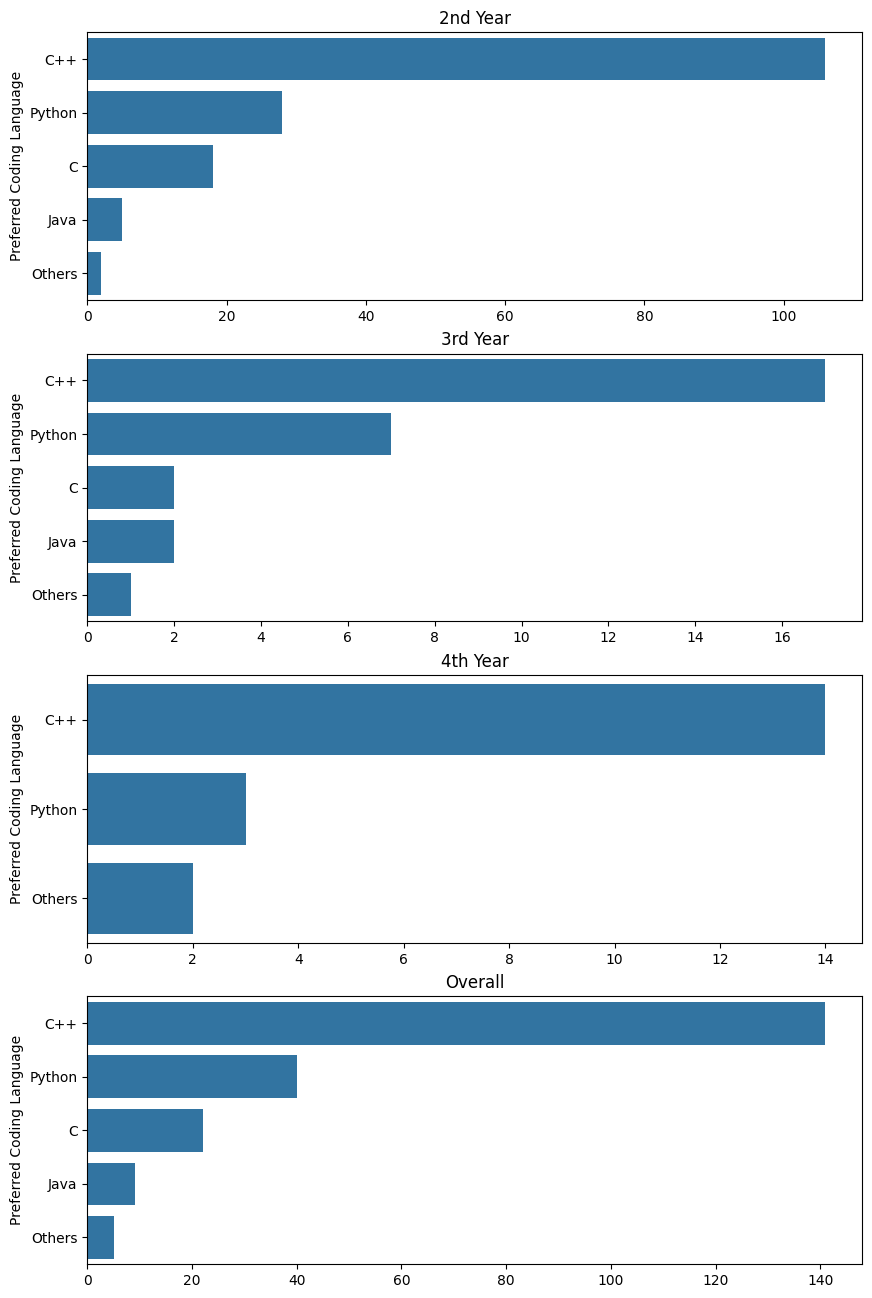

In [275]:
print("What is the favourite programming language of competitive programmers throughout the years?\n")

plt.figure(figsize=(10,16))
    
plt.subplot(4,1,1)
plt.title('2nd Year')
sns.barplot(x=df[df['year'] == 2]['coding_lang'].value_counts().values, y=df[df['year'] == 2]['coding_lang'].value_counts().keys(), orient='h')
plt.ylabel('Preferred Coding Language')

plt.subplot(4,1,2)
plt.title('3rd Year')
sns.barplot(x=df[df['year'] == 3]['coding_lang'].value_counts().values, y=df[df['year'] == 3]['coding_lang'].value_counts().keys(), orient='h')
plt.ylabel('Preferred Coding Language')

plt.subplot(4,1,3)
plt.title('4th Year')
sns.barplot(x=df[df['year'] == 4]['coding_lang'].value_counts().values, y=df[df['year'] == 4]['coding_lang'].value_counts().keys(), orient='h')
plt.ylabel('Preferred Coding Language')

plt.subplot(4,1,4)
plt.title('Overall')
sns.barplot(x=df['coding_lang'].value_counts().values, y=df['coding_lang'].value_counts().keys(), orient='h')
plt.ylabel('Preferred Coding Language')

plt.show()



Some observations:-
* C++ seems to be the preferred language throughout the years for competitive programmers.
* Java and C lose their popularity among the higher year competitive programmers.

### Are our coders single?

Text(0.5, 0, 'Relationship Status')

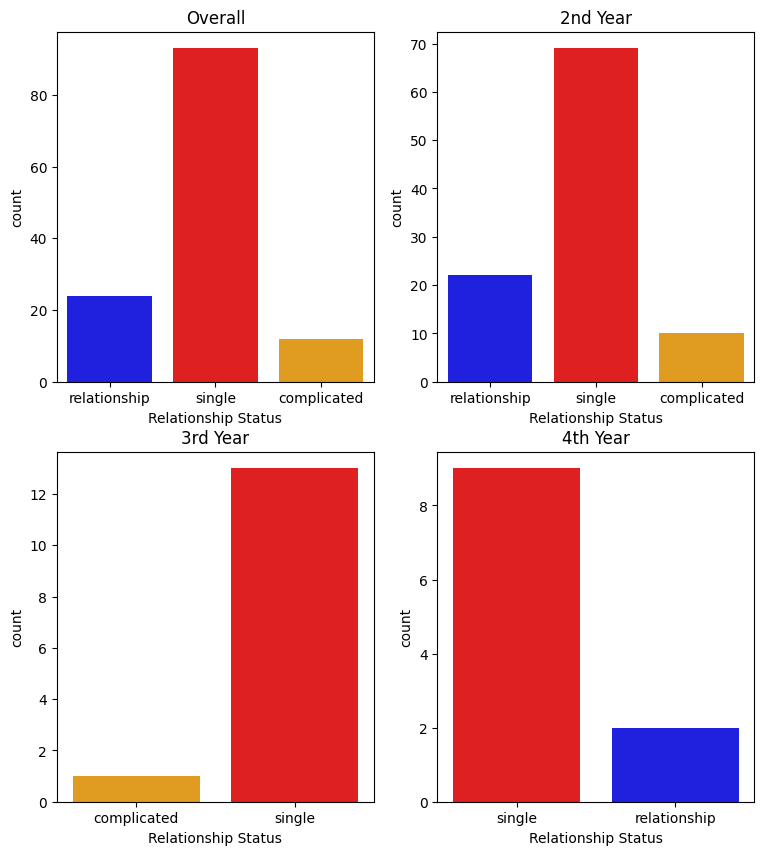

In [293]:
plt.figure(figsize=(9,10))

plt.subplot(2,2,1)
plt.title('Overall')
sns.countplot(data=df[df['CP'] == 1], x='relationship', palette={'relationship': 'blue', 'single': 'red', 'complicated': 'orange'})
plt.xlabel('Relationship Status')

plt.subplot(2,2,2)
plt.title('2nd Year')
sns.countplot(data=df[(df['CP'] == 1) & (df['year']==2)], x='relationship', palette={'relationship': 'blue', 'single': 'red', 'complicated': 'orange'})
plt.xlabel('Relationship Status')

plt.subplot(2,2,3)
plt.title('3rd Year')
sns.countplot(data=df[(df['CP'] == 1) & (df['year']==3)], x='relationship', palette={'relationship': 'blue', 'single': 'red', 'complicated': 'orange'})
plt.xlabel('Relationship Status')

plt.subplot(2,2,4)
plt.title('4th Year')
sns.countplot(data=df[(df['CP'] == 1) & (df['year']==4)], x='relationship', palette={'relationship': 'blue', 'single': 'red', 'complicated': 'orange'})
plt.xlabel('Relationship Status')
# plt.legend()

Observations:-
* As expected, most of our competitive programmers are single.
* But those who are in a relationship can be found in 2nd and 4th years.
* The competitive programmers are not getting into complicated relations as the years increase

### How does department affect satisfaction and CPI?

### Does satisfaction affect CPI?

### Does satisfaction have anything to do with gender?